In [1]:
#Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
df_customers = pd.read_csv("/kaggle/input/ecommerce-transactions-dataset1/Customers.csv")
df_transactions = pd.read_csv("/kaggle/input/ecommerce-transactions-dataset1/Transactions.csv")

In [3]:
df_merged = df_transactions.merge(df_customers, on="CustomerID", how="inner")
df_merged['RegionEncoded'] = df_merged['Region'].astype('category').cat.codes
customer_summary = df_merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'RegionEncoded': 'first'
}).reset_index()

In [4]:
X = customer_summary.drop(columns=['CustomerID'])

In [10]:
# Visualize clusters for K-Means
def visualize_kmeans(X, cluster_counts):
    for k in cluster_counts:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans_labels = kmeans.fit_predict(X)
        
        plt.figure(figsize=(4, 3))
        plt.scatter(X['TotalValue'], X['Quantity'], c=kmeans_labels, cmap='viridis', alpha=0.7)
        plt.title(f'K-Means Clustering with {k} Clusters')
        plt.xlabel('TotalValue')
        plt.ylabel('Quantity')
        plt.show()

In [11]:
# Visualize clusters for GMM
def visualize_gmm(X, cluster_counts):
    for k in cluster_counts:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm_labels = gmm.fit_predict(X)
        
        plt.figure(figsize=(4, 3))
        plt.scatter(X['TotalValue'], X['Quantity'], c=gmm_labels, cmap='viridis', alpha=0.7)
        plt.title(f'GMM Clustering with {k} Clusters')
        plt.xlabel('TotalValue')
        plt.ylabel('Quantity')
        plt.show()

Visualizing K-Means Clusters:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


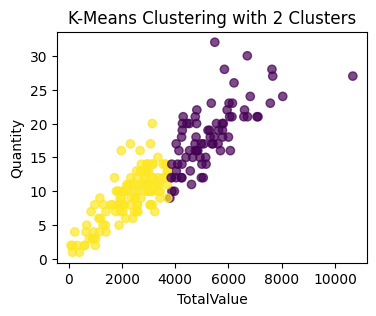

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


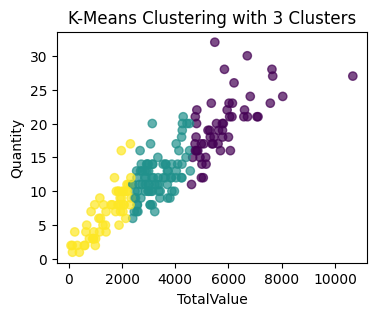

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


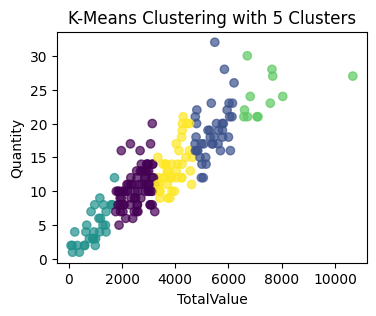

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


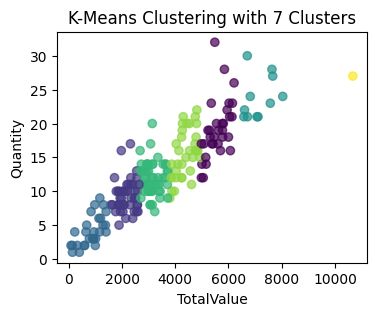

In [12]:
# Define the cluster counts to visualize
cluster_counts = [2, 3, 5, 7]

# Visualize for K-Means
print("Visualizing K-Means Clusters:")
visualize_kmeans(X, cluster_counts)

Visualizing GMM Clusters:


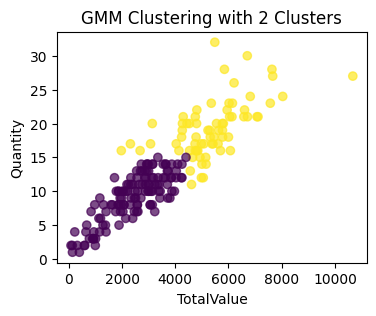

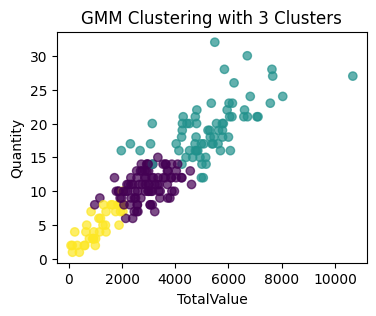

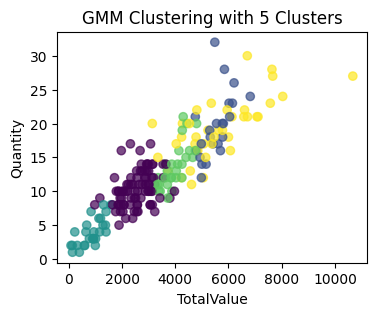

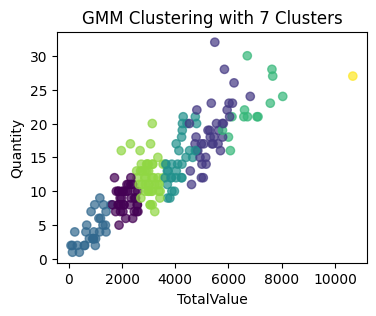

In [13]:
# Visualize for GMM
print("Visualizing GMM Clusters:")
visualize_gmm(X, cluster_counts)

In [14]:
# Function to evaluate clustering metrics
def evaluate_clustering(X, labels):
    return {
        "DB Index": davies_bouldin_score(X, labels),
        "Silhouette Score": silhouette_score(X, labels)
    }

In [16]:
# Evaluate clustering for different cluster counts
def evaluate_clusters(X, cluster_counts):
    cluster_results = {}
    for n_clusters in cluster_counts:
        # K-Means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(X)
        kmeans_metrics = evaluate_clustering(X, kmeans_labels)

        # Hierarchical
        hierarchical = linkage(X, method='ward')
        hierarchical_labels = fcluster(hierarchical, t=n_clusters, criterion='maxclust')
        hierarchical_metrics = evaluate_clustering(X, hierarchical_labels)

        # GMM
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        gmm_labels = gmm.fit_predict(X)
        gmm_metrics = evaluate_clustering(X, gmm_labels)

        # Store results
        cluster_results[n_clusters] = {
            "K-Means": kmeans_metrics,
            "Hierarchical": hierarchical_metrics,
            "GMM": gmm_metrics
        }
    return cluster_results


Results for 3 Clusters:
  K-Means: DB Index = 0.569, Silhouette Score = 0.532
  Hierarchical: DB Index = 0.583, Silhouette Score = 0.509
  GMM: DB Index = 0.630, Silhouette Score = 0.418

Results for 5 Clusters:
  K-Means: DB Index = 0.525, Silhouette Score = 0.537
  Hierarchical: DB Index = 0.535, Silhouette Score = 0.530
  GMM: DB Index = 6.471, Silhouette Score = 0.274

Results for 7 Clusters:
  K-Means: DB Index = 0.449, Silhouette Score = 0.549
  Hierarchical: DB Index = 0.436, Silhouette Score = 0.535
  GMM: DB Index = 0.530, Silhouette Score = 0.459



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# Cluster counts to evaluate
cluster_counts = [3, 5, 7]

# Evaluate clusters and store results
multi_cluster_results = evaluate_clusters(X, cluster_counts)  # Ensure X is preprocessed

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# Print Results
for n_clusters, metrics in multi_cluster_results.items():
    print(f"Results for {n_clusters} Clusters:")
    for method, scores in metrics.items():
        db_index = scores['DB Index']
        silhouette = scores['Silhouette Score']
        print(f"  {method}: DB Index = {db_index:.3f}, Silhouette Score = {silhouette:.3f}")
    print()

Results for 3 Clusters:
  K-Means: DB Index = 0.569, Silhouette Score = 0.532
  Hierarchical: DB Index = 0.583, Silhouette Score = 0.509
  GMM: DB Index = 0.630, Silhouette Score = 0.418

Results for 5 Clusters:
  K-Means: DB Index = 0.525, Silhouette Score = 0.537
  Hierarchical: DB Index = 0.535, Silhouette Score = 0.530
  GMM: DB Index = 6.471, Silhouette Score = 0.274

Results for 7 Clusters:
  K-Means: DB Index = 0.449, Silhouette Score = 0.549
  Hierarchical: DB Index = 0.436, Silhouette Score = 0.535
  GMM: DB Index = 0.530, Silhouette Score = 0.459



# Best algorthim and cluster

In [19]:
#since for optimal results
# DB Index (Lower is Better) and Silhouette Score (Higher is Better).


# Overall Best:K-Means with 7 Clusters is the best overall:	
# •	DB Index = 0.449 (Lowest among all methods and cluster configurations).	
# •	Silhouette Score = 0.549 (Highest among all methods and cluster configurations).


# **After Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X contains 'TotalValue', 'Quantity', 'RegionEncoded'

In [26]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Function to calculate clustering metrics
def calculate_metrics(X, labels, method_name):
    db_index = davies_bouldin_score(X, labels)
    silhouette = silhouette_score(X, labels)
    
    print(f"{method_name}:")
    print(f"  - DB Index: {db_index:.3f}")
    print(f"  - Silhouette Score: {silhouette:.3f}")
    print()

# Perform clustering with the selected best method (Hierarchical Clustering with 5 clusters)
from scipy.cluster.hierarchy import linkage, fcluster

n_clusters = 7
linkage_matrix = linkage(X_scaled, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

# Calculate metrics for Hierarchical Clustering
calculate_metrics(X_scaled, hierarchical_labels, "Hierarchical Clustering (5 Clusters)")

# Example for K-Means with 5 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
calculate_metrics(X_scaled, kmeans_labels, "K-Means Clustering (5 Clusters)")

# Example for GMM with 5 clusters
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
calculate_metrics(X_scaled, gmm_labels, "GMM Clustering (5 Clusters)")

Hierarchical Clustering (5 Clusters):
  - DB Index: 0.850
  - Silhouette Score: 0.355

K-Means Clustering (5 Clusters):
  - DB Index: 0.935
  - Silhouette Score: 0.355

GMM Clustering (5 Clusters):
  - DB Index: 1.132
  - Silhouette Score: 0.223



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
